In [2]:
from pycalphad import equilibrium, Database
import pycalphad.variables as v
import timeit
import numpy as np
db_alfe = Database('/home/rotis/git/pycalphad/research/alfe_sei.TDB')

In [2]:
my_phases_alfe = ['LIQUID', 'HCP_A3', 'AL5FE2', 'AL2FE', 'AL5FE4', 'FCC_A1', 'B2_BCC', 'AL13FE4']
results = []
for nprocs in [1, 2, 4, 8, 16]:
    ct = timeit.timeit("equilibrium(db_alfe, ['AL', 'FE', 'VA'], my_phases_alfe, {v.T: (300,2000,100), v.P: 101325,v.X('AL'): (0,1,0.02)}, verbose=False, pbar=False, nprocs=nprocs)",
                       number=1, globals=globals())
    results.append([nprocs, ct])
results = np.array(results)

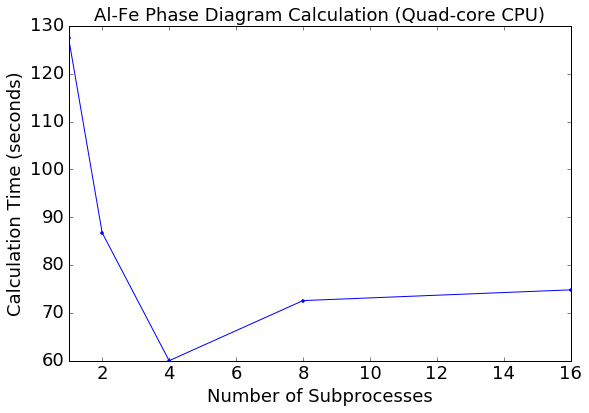

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(9,6))
fig.gca().plot(results[:,0], results[:,1], marker='.')
fig.gca().set_xlabel('Number of Subprocesses', fontsize=18)
fig.gca().set_ylabel('Calculation Time (seconds)', fontsize=18)
fig.gca().set_xlim((1,None))
fig.gca().set_title('Al-Fe Phase Diagram Calculation (Quad-core CPU)', fontsize=18)
fig.gca().tick_params(labelsize=18)
plt.show()

In [3]:
from pycalphad.core.equilibrium import  worker_process
from cloudpickle import dumps, loads
proc = dumps(db_alfe)
func = loads(proc)

In [4]:
func == db_alfe

True